In [108]:
import glob
import sqlite3
import pandasql
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [109]:
tennis_date = !git clone https://github.com/JeffSackmann/tennis_atp
glob.glob("tennis_atp/atp_matches_[0123456789]*")

['tennis_atp\\atp_matches_1968.csv',
 'tennis_atp\\atp_matches_1969.csv',
 'tennis_atp\\atp_matches_1970.csv',
 'tennis_atp\\atp_matches_1971.csv',
 'tennis_atp\\atp_matches_1972.csv',
 'tennis_atp\\atp_matches_1973.csv',
 'tennis_atp\\atp_matches_1974.csv',
 'tennis_atp\\atp_matches_1975.csv',
 'tennis_atp\\atp_matches_1976.csv',
 'tennis_atp\\atp_matches_1977.csv',
 'tennis_atp\\atp_matches_1978.csv',
 'tennis_atp\\atp_matches_1979.csv',
 'tennis_atp\\atp_matches_1980.csv',
 'tennis_atp\\atp_matches_1981.csv',
 'tennis_atp\\atp_matches_1982.csv',
 'tennis_atp\\atp_matches_1983.csv',
 'tennis_atp\\atp_matches_1984.csv',
 'tennis_atp\\atp_matches_1985.csv',
 'tennis_atp\\atp_matches_1986.csv',
 'tennis_atp\\atp_matches_1987.csv',
 'tennis_atp\\atp_matches_1988.csv',
 'tennis_atp\\atp_matches_1989.csv',
 'tennis_atp\\atp_matches_1990.csv',
 'tennis_atp\\atp_matches_1991.csv',
 'tennis_atp\\atp_matches_1992.csv',
 'tennis_atp\\atp_matches_1993.csv',
 'tennis_atp\\atp_matches_1994.csv',
 

In [110]:
atp_matches = pd.concat(
    [pd.read_csv(i) for i in glob.glob("tennis_atp/atp_matches_[12][019][01298]*")],
    axis=0,
)

atp_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142226 entries, 0 to 2915
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          142226 non-null  object 
 1   tourney_name        142226 non-null  object 
 2   surface             142199 non-null  object 
 3   draw_size           142226 non-null  int64  
 4   tourney_level       142226 non-null  object 
 5   tourney_date        142226 non-null  int64  
 6   match_num           142226 non-null  int64  
 7   winner_id           142226 non-null  int64  
 8   winner_seed         58505 non-null   object 
 9   winner_entry        15558 non-null   object 
 10  winner_name         142226 non-null  object 
 11  winner_hand         142215 non-null  object 
 12  winner_ht           138262 non-null  float64
 13  winner_ioc          142226 non-null  object 
 14  winner_age          142088 non-null  float64
 15  loser_id            142226 non-null 

In [111]:
cols_null_percent = atp_matches.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

winner_entry          89.061072
loser_entry           81.641894
loser_seed            78.195970
winner_seed           58.864765
minutes               37.067062
w_1stWon              35.245314
w_ace                 35.245314
w_bpFaced             35.245314
w_bpSaved             35.245314
w_2ndWon              35.245314
w_1stIn               35.245314
w_svpt                35.245314
w_df                  35.245314
l_svpt                35.245314
l_df                  35.245314
l_1stIn               35.245314
l_1stWon              35.245314
l_2ndWon              35.245314
l_bpSaved             35.245314
l_bpFaced             35.245314
l_ace                 35.245314
l_SvGms               35.244611
w_SvGms               35.244611
loser_rank_points     28.046208
winner_rank_points    27.086468
loser_rank             7.942992
loser_ht               5.809064
winner_rank            4.523786
winner_ht              2.787113
loser_age              0.380381
winner_age             0.097029
loser_ha

In [112]:
n = atp_matches.shape[0] 
thresh1 = n*0.64
atp_matches = atp_matches.dropna( thresh=thresh1, axis=1)

m = atp_matches.shape[1]
atp_matches = atp_matches.dropna( thresh=m-2, axis=0)

In [113]:
cols_null_percent = atp_matches.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

loser_rank_points     1.312867
winner_rank_points    1.150664
loser_ht              0.898106
loser_rank            0.301546
winner_ht             0.187241
winner_rank           0.142608
loser_age             0.010886
loser_hand            0.004354
winner_hand           0.001089
dtype: float64

In [114]:
atp_matches['winner_rank'] = atp_matches['winner_rank'].fillna(
    atp_matches['winner_rank'].median()
)

In [115]:
atp_matches['winner_rank'].isna().sum()

0

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [116]:
stats.shapiro(atp_matches['winner_rank'])

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6009070873260498, pvalue=0.0)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html?highlight=normalt#scipy.stats.normaltest

In [117]:
stats.normaltest(atp_matches['winner_rank'])

NormaltestResult(statistic=102195.81771324863, pvalue=0.0)

((array([-4.32735117, -4.1277583 , -4.01916863, ...,  4.01916863,
          4.1277583 ,  4.32735117]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 7.4815557 , 7.50769008,
         7.54486107])),
 (1.1226465611018173, 3.6215765351180242, 0.9872304981859976))

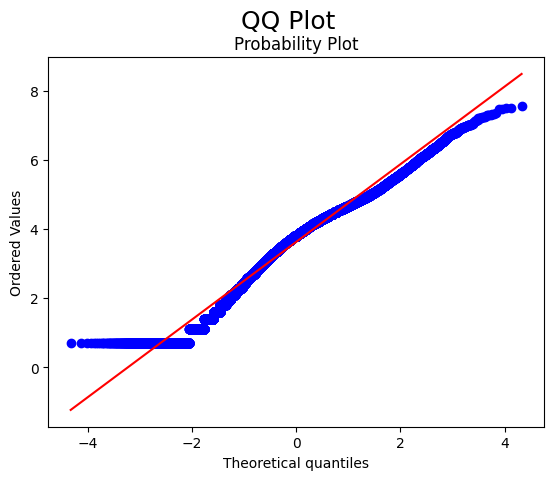

In [119]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(np.log1p(atp_matches['winner_rank']), dist="norm", plot=ax1)

In [120]:
atp_matches['winner_rank'].describe()

count    91860.000000
mean        63.658502
std         81.375181
min          1.000000
25%         18.000000
50%         44.000000
75%         83.000000
max       1890.000000
Name: winner_rank, dtype: float64

<AxesSubplot: >

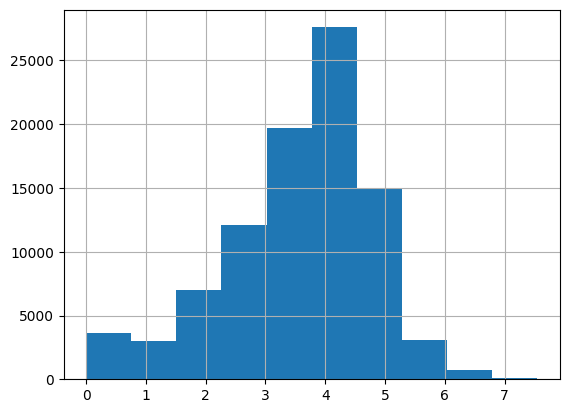

In [121]:
np.log(atp_matches['winner_rank']).hist()

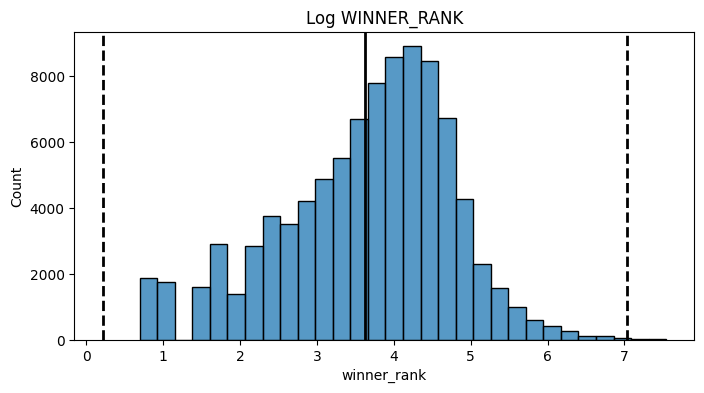

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_winner = np.log(atp_matches['winner_rank'] + 1)
histplot = sns.histplot(log_winner, bins=30, ax=ax)
histplot.axvline(log_winner.mean(), color='k', lw=2)
histplot.axvline(log_winner.mean()+ 3 * log_winner.std(), color='k', ls='--', lw=2)
histplot.axvline(log_winner.mean()- 3 * log_winner.std(), color='k', ls='--', lw=2)
histplot.set_title('Log WINNER_RANK');

    Все-таки распределение лого-нормальное, поэтому будем рассматривать параметрические тесты

In [123]:
atp_matches['diff_winner_rank'] = abs(atp_matches['winner_rank'] - atp_matches['loser_rank'])
atp_matches['diff_winner_rank'].head()

0     54.0
1    229.0
2     13.0
3     34.0
4     60.0
Name: diff_winner_rank, dtype: float64

((array([-4.25867305, -4.05601686, -3.94564695, ...,  3.94564695,
          4.05601686,  4.25867305]),
  array([0.        , 0.        , 0.        , ..., 7.48099216, 7.50714108,
         7.54433211])),
 (1.2327457058524518, 3.6168028606939635, 0.9837857175418969))

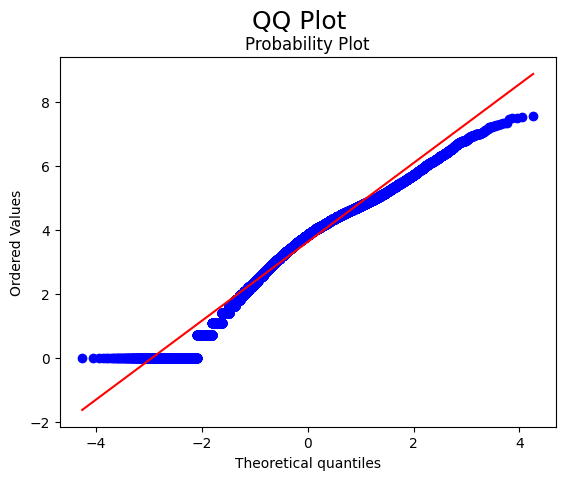

In [124]:
diff_rank_20 = pandasql.sqldf(""" 
    SELECT *
    FROM atp_matches
    WHERE diff_winner_rank > 20;""")


fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log(diff_rank_20['winner_rank']), dist="norm", plot=ax1
)

((array([-4.02344576, -3.80956001, -3.69261851, ...,  3.69261851,
          3.80956001,  4.02344576]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.53233429, 6.88959131,
         7.19668657])),
 (1.0036624970912391, 3.4623790439646234, 0.9681838077523915))

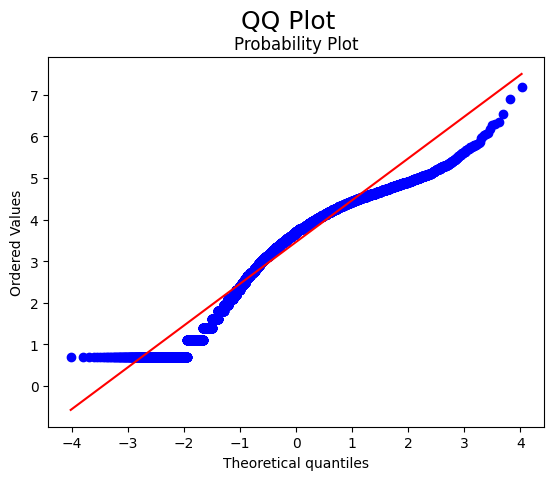

In [125]:
diff_rank_less20 = pandasql.sqldf(""" 
    SELECT *
    FROM atp_matches
    WHERE diff_winner_rank <= 20;""")

    
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log(diff_rank_less20['winner_rank']+1), dist="norm", plot=ax1
)

Т.К. распределение близко к нормальному (логонормальное),  мы переходим к параметрическим тестам для проверки нашей нулевой гипотезы. Мы сравниваем количественные переменные, значит используем тест на сравнение выборок. Групп для сравнения всего две, и объектов в каждой выборке >= 30. Нужно использовать Z-тест, но так как мы не знаем дисперсию и среднее отклоенение, то используем T-тест.

In [126]:
H0 = 'Шанс выиграша равен независимо от Ранга'
H1 = 'Больший ранг влияет на результат выигрыша'

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [127]:
stats.ttest_ind(diff_rank_20['winner_rank'],diff_rank_less20['winner_rank'], equal_var=True)

Ttest_indResult(statistic=37.71396273928608, pvalue=6.990511919309364e-309)

Мы видим, что p-value сильно ниже 0.05 => мы отвергаем Н0 (нулевую гипотезу)

    Теперь разберемся с игроками в диапозоне +/- 5 ранга.

In [128]:
diff_rank_5 = atp_matches[atp_matches['diff_winner_rank'] <=5]
diff_rank_5 = diff_rank_5.reset_index()
diff_rank_5.head()

,index,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank
0,5,1991-339,Adelaide,Hard,32,A,19901231,6,102148,Fabrice Santoro,...,20.0,8.0,9.0,10.0,16.0,62.0,NaN,59.0,NaN,3.0
1,28,1991-339,Adelaide,Hard,32,A,19901231,29,101900,Nicklas Kulti,...,24.0,13.0,11.0,3.0,7.0,51.0,NaN,56.0,NaN,5.0
2,32,1991-354,Wellington,Hard,32,A,19901231,2,101265,Patrick McEnroe,...,22.0,8.0,8.0,6.0,11.0,120.0,NaN,123.0,NaN,3.0
3,44,1991-354,Wellington,Hard,32,A,19901231,14,101354,Andrew Sznajder,...,20.0,10.0,10.0,1.0,5.0,104.0,NaN,107.0,NaN,3.0
4,52,1991-354,Wellington,Hard,32,A,19901231,22,100962,Thomas Hogstedt,...,14.0,15.0,9.0,2.0,5.0,91.0,NaN,89.0,NaN,2.0


In [129]:
diff_rank_greater5 = atp_matches[atp_matches['diff_winner_rank'] >5]
diff_rank_greater5 = diff_rank_greater5.reset_index()
diff_rank_greater5.head()

,index,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank
0,0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,Magnus Larsson,...,44.0,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN,54.0
1,1,1991-339,Adelaide,Hard,32,A,19901231,2,100946,Slobodan Zivojinovic,...,35.0,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN,229.0
2,2,1991-339,Adelaide,Hard,32,A,19901231,3,101234,Patrik Kuhnen,...,22.0,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN,13.0
3,3,1991-339,Adelaide,Hard,32,A,19901231,4,101889,Todd Woodbridge,...,30.0,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN,34.0
4,4,1991-339,Adelaide,Hard,32,A,19901231,5,101274,Udo Riglewski,...,28.0,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN,60.0


In [130]:
stats.ttest_ind(
    diff_rank_5['winner_rank'],diff_rank_greater5['winner_rank'], equal_var=True
)

Ttest_indResult(statistic=-20.489386817063547, pvalue=4.335325951249478e-93)

P-value меньше 0,05 => тоже отвергаем H0

      Правда ли, что среднее количество сетов, которое необходимо любому игроку для победы в матче, сокращается со временем?

In [131]:
atp_matches["sets_num"] = atp_matches["score"].map(lambda x: len(x.split()))

In [132]:
atp_matches['sets_num'].isna().sum()

0

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='sets_num'>

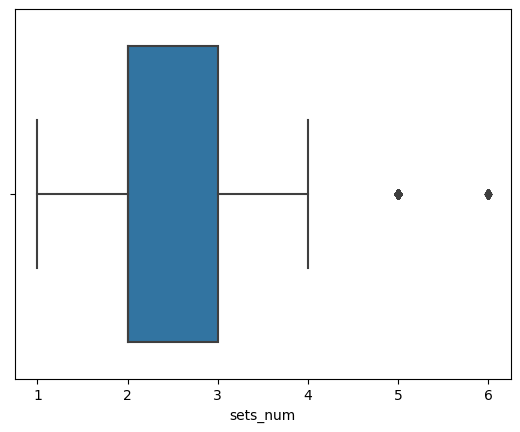

In [133]:
sns.boxplot(atp_matches['sets_num'])

In [134]:
atp_matches['tourney_date'] = pd.to_datetime(atp_matches['tourney_date'], format='%Y%m%d')
atp_matches["tourney_date"].head()

0   1990-12-31
1   1990-12-31
2   1990-12-31
3   1990-12-31
4   1990-12-31
Name: tourney_date, dtype: datetime64[ns]

In [135]:
atp_matches[atp_matches['sets_num'] == 6].shape[0]

38

По правилам должно быть не больше 5 сетов.

In [136]:
mask_set = atp_matches[atp_matches['sets_num'] != 6]
mask_set.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank,sets_num
0,1991-339,Adelaide,Hard,32,A,1990-12-31,1,101723,Magnus Larsson,R,...,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN,54.0,3
1,1991-339,Adelaide,Hard,32,A,1990-12-31,2,100946,Slobodan Zivojinovic,R,...,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN,229.0,3
2,1991-339,Adelaide,Hard,32,A,1990-12-31,3,101234,Patrik Kuhnen,R,...,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN,13.0,2
3,1991-339,Adelaide,Hard,32,A,1990-12-31,4,101889,Todd Woodbridge,R,...,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN,34.0,2
4,1991-339,Adelaide,Hard,32,A,1990-12-31,5,101274,Udo Riglewski,R,...,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN,60.0,2


c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='sets_num'>

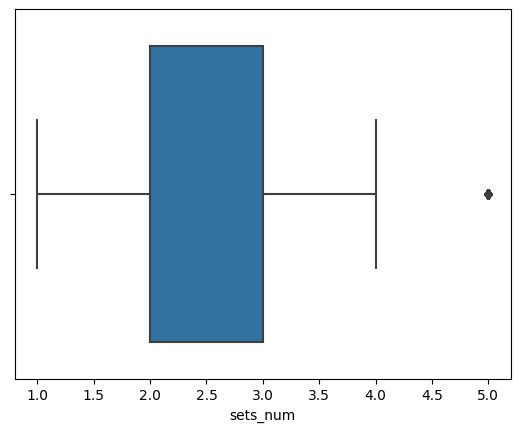

In [137]:
sns.boxplot(mask_set['sets_num'])

Разбейте данные на две группы — с 1980 до 2001 гг. и 2002-2022 гг.

In [138]:
atp_matches["tourney_date"]

0      1990-12-31
1      1990-12-31
2      1990-12-31
3      1990-12-31
4      1990-12-31
          ...    
2909   2022-03-04
2910   2022-03-04
2911   2022-03-04
2912   2022-03-04
2913   2022-03-04
Name: tourney_date, Length: 91860, dtype: datetime64[ns]

In [139]:
mask_set["tourney_date"] = mask_set["tourney_date"].dt.year

C:\Users\rinen\AppData\Local\Temp\ipykernel_27232\144444436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask_set["tourney_date"] = mask_set["tourney_date"].dt.year


((array([-2.03779133, -1.64072656, -1.40239528, -1.22456199, -1.07878552,
         -0.95292829, -0.84060464, -0.73800319, -0.64264332, -0.55280255,
         -0.46722113, -0.38493614, -0.30518168, -0.22732525, -0.15082484,
         -0.07519829,  0.        ,  0.07519829,  0.15082484,  0.22732525,
          0.30518168,  0.38493614,  0.46722113,  0.55280255,  0.64264332,
          0.73800319,  0.84060464,  0.95292829,  1.07878552,  1.22456199,
          1.40239528,  1.64072656,  2.03779133]),
  array([2.33333333, 2.54181084, 2.54227232, 2.54796889, 2.54814815,
         2.5582038 , 2.56420596, 2.57712126, 2.58045977, 2.58264725,
         2.5882718 , 2.58840864, 2.59024935, 2.59151009, 2.59250765,
         2.59471206, 2.59836624, 2.60141685, 2.60286104, 2.60329341,
         2.61027523, 2.61149346, 2.61666052, 2.62165021, 2.62354359,
         2.62413793, 2.64102564, 2.64247517, 2.64414587, 2.65843621,
         2.67804878, 2.70127119, 2.72921109])),
 (0.05907199074302119, 2.59788313916834, 0.8

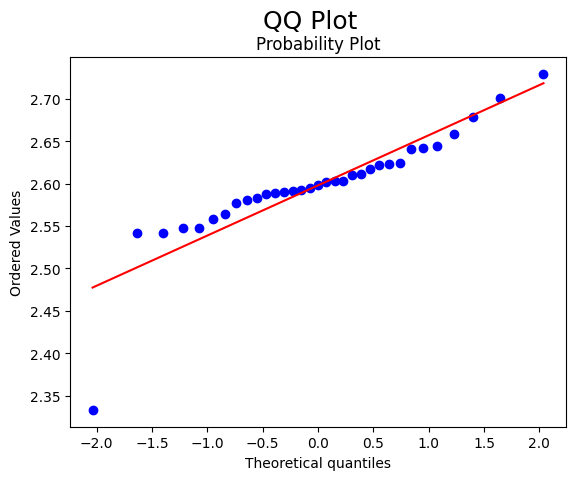

In [140]:
mean_year_sets = mask_set.groupby('tourney_date')['sets_num'].mean()

fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(mean_year_sets, dist="norm", plot=ax1)

In [141]:
stats.shapiro(mean_year_sets)

ShapiroResult(statistic=0.8192764520645142, pvalue=7.693520456086844e-05)

In [142]:
stats.normaltest(mean_year_sets)

NormaltestResult(statistic=29.28248976127254, pvalue=4.379133047000851e-07)

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='sets_num'>

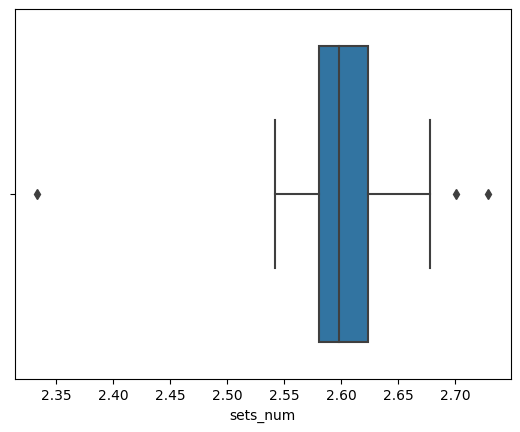

In [143]:
sns.boxplot(mean_year_sets)

In [144]:
mask_set_1980_2001 = mask_set[mask_set['tourney_date'] <= 2001]
mask_set_2002_2022 = mask_set[mask_set['tourney_date'] >= 2002]

In [145]:
mean_sets_over2002 = mask_set_2002_2022.groupby('tourney_date')['sets_num'].mean()

<AxesSubplot: >

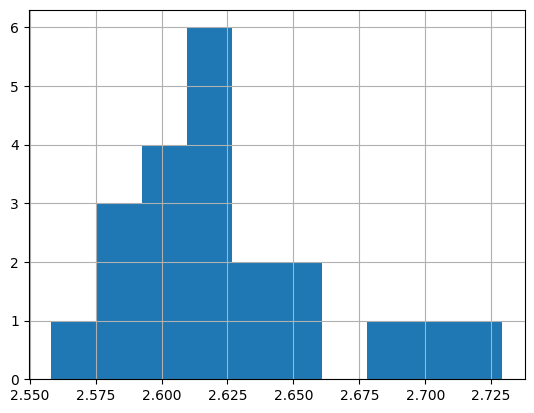

In [146]:
mean_sets_over2002.hist()

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([2.5582038 , 2.57712126, 2.59024935, 2.59151009, 2.59250765,
         2.59471206, 2.60141685, 2.60329341, 2.61027523, 2.61149346,
         2.61666052, 2.62165021, 2.62354359, 2.62413793, 2.64102564,
         2.64247517, 2.64414587, 2.65843621, 2.67804878, 2.70127119,
         2.72921109])),
 (0.04180766936444374, 2.624351875187013, 0.9628994967007333))

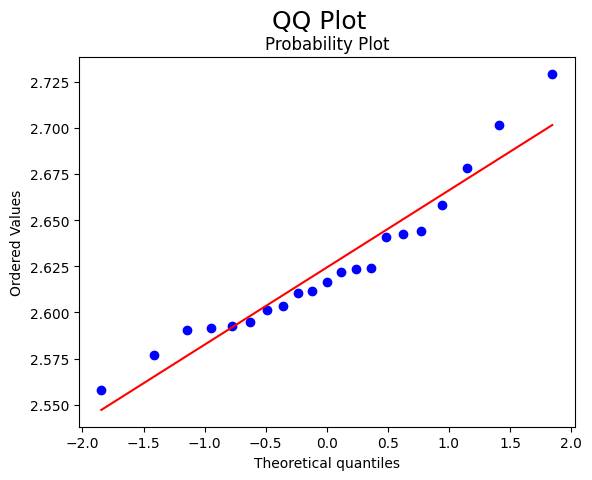

In [147]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(mean_sets_over2002, dist="norm", plot=ax1)

In [148]:
stats.shapiro(mean_sets_over2002)

ShapiroResult(statistic=0.9338598251342773, pvalue=0.16446754336357117)

Эти данные распределен нормально

<AxesSubplot: >

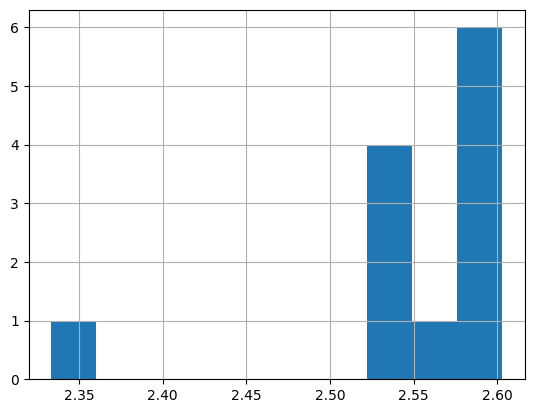

In [149]:
mean_sets_less2001 = mask_set_1980_2001.groupby('tourney_date')['sets_num'].mean()
mean_sets_less2001.hist()

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([2.33333333, 2.54181084, 2.54227232, 2.54796889, 2.54814815,
         2.56420596, 2.58045977, 2.58264725, 2.5882718 , 2.58840864,
         2.59836624, 2.60286104])),
 (0.05921800032073642, 2.5515628511356625, 0.7606022735726901))

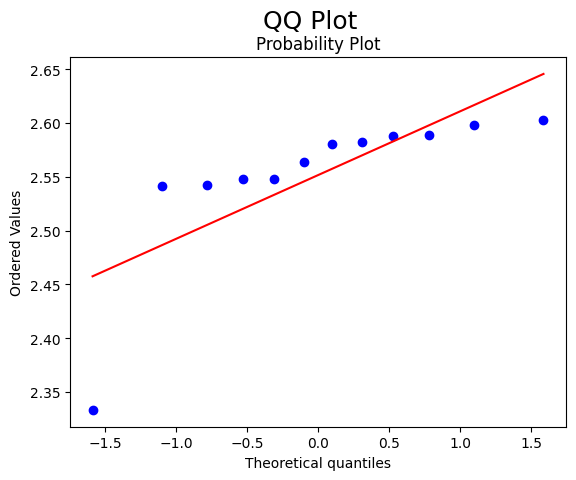

In [150]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(mean_sets_less2001, dist="norm", plot=ax1)

<AxesSubplot: xlabel='tourney_date', ylabel='sets_num'>

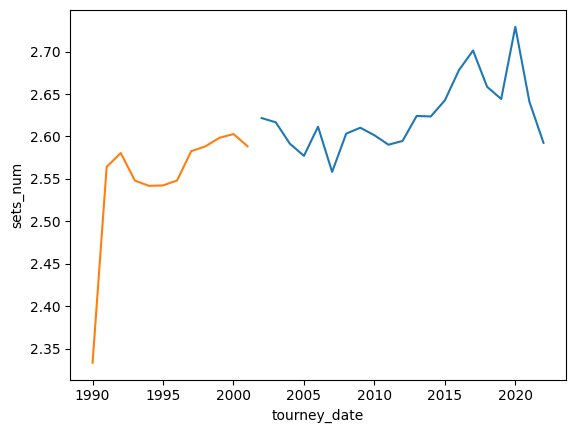

In [151]:
sns.lineplot(data = mean_sets_over2002)
sns.lineplot(data = mean_sets_less2001)

In [152]:
H0 = 'Среднее количество сетов со временем не изменялось'
HA = 'Среднее количество сетов со временем изменялось в сторону увеличения'

In [153]:
stats.ttest_ind(mean_sets_over2002, mean_sets_less2001, equal_var=True)

Ttest_indResult(statistic=3.7040999613712122, pvalue=0.0008252564231053834)

p-value < 0.05 - следовательно отвергаем H0

    Оставьте только матчи best of 5 (колонка best_of) и определите — является ли разница среднего количества сетов, которое сыграл победитель, значимой для выборок матчей по 1980 до 2001 гг. и 2002-2022 гг. Выбор статистического теста обоснуйте.

In [154]:
mask_set_best5 = mask_set_1980_2001['best_of'] == 5
set_1980_2001_best5 = mask_set_1980_2001[mask_set_best5]

set_1980_2001_best5.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank,sets_num
124,1991-580,Australian Open,Hard,128,G,1991,1,101222,Stefan Edberg,R,...,11.0,14.0,4.0,10.0,1.0,3889.0,162.0,202.0,161.0,3
125,1991-580,Australian Open,Hard,128,G,1991,2,100995,Eduardo Masso,L,...,29.0,26.0,7.0,18.0,124.0,278.0,81.0,453.0,43.0,5
126,1991-580,Australian Open,Hard,128,G,1991,3,101138,Pat Cash,R,...,12.0,12.0,9.0,16.0,84.0,432.0,32.0,845.0,52.0,3
127,1991-580,Australian Open,Hard,128,G,1991,4,100870,Christo Van Rensburg,R,...,26.0,14.0,8.0,15.0,59.0,527.0,82.0,448.0,23.0,3
128,1991-580,Australian Open,Hard,128,G,1991,5,101731,Nuno Marques,L,...,28.0,23.0,9.0,13.0,104.0,340.0,116.0,299.0,12.0,5


In [155]:
mask_set_best5 = mask_set_2002_2022['best_of'] == 5
set_2002_2022_best5 = mask_set_2002_2022[mask_set_best5]

set_2002_2022_best5.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank,sets_num
225,2002-314,Gstaad,Clay,32,A,2002,31,102374,Alex Corretja,R,...,24.0,16.0,5.0,9.0,28.0,1145.0,27.0,1198.0,1.0,3
365,2002-319,Kitzbuhel,Clay,48,A,2002,47,102374,Alex Corretja,R,...,6.0,13.0,5.0,13.0,31.0,1095.0,8.0,2050.0,23.0,3
396,2002-321,Stuttgart,Clay,32,A,2002,31,104022,Mikhail Youzhny,R,...,31.0,23.0,5.0,9.0,62.0,653.0,19.0,1585.0,43.0,5
458,2002-328,Basel,Carpet,32,A,2002,31,103900,David Nalbandian,R,...,11.0,14.0,3.0,8.0,18.0,1592.0,20.0,1513.0,2.0,3
575,2002-337,Vienna,Hard,32,A,2002,31,103819,Roger Federer,R,...,24.0,18.0,6.0,12.0,13.0,1925.0,12.0,1961.0,1.0,4


In [156]:
best_5_mean_over2022 = set_2002_2022_best5.groupby(
    'tourney_date'
)['sets_num'].mean()

best_5_mean_over2022.head()

tourney_date
2002    3.764933
2003    3.718447
2004    3.694553
2005    3.673745
2006    3.673077
Name: sets_num, dtype: float64

In [157]:
best_5_mean_less2001 = set_1980_2001_best5.groupby(
    'tourney_date'
)['sets_num'].mean()

best_5_mean_less2001.head()

tourney_date
1991    3.767123
1992    3.737548
1993    3.727273
1994    3.701944
1995    3.642715
Name: sets_num, dtype: float64

<AxesSubplot: xlabel='tourney_date', ylabel='sets_num'>

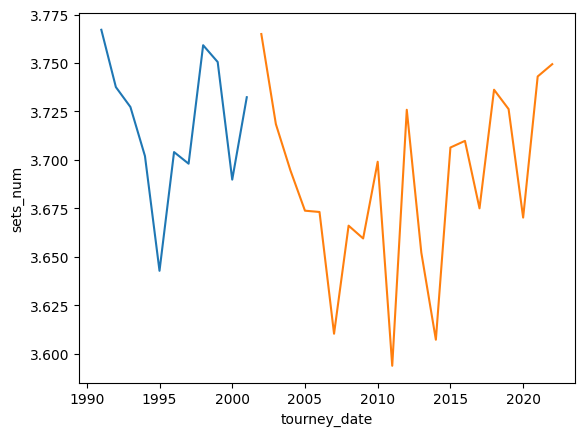

In [158]:
sns.lineplot(data = best_5_mean_less2001)
sns.lineplot(data = best_5_mean_over2022)

Здесь уже выборка зависима, т.к. играем один челока, поэтому тест Манни-Уитни

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [159]:
stats.mannwhitneyu(best_5_mean_less2001, best_5_mean_over2022)

MannwhitneyuResult(statistic=161.0, pvalue=0.07419336252459523)

Здесь видим, что p-value выше 0.05, да и на графике заметная дисперсия, поэтому здесь среднее количество сетов со временем изменяется. Просто на всякий случай проверю t-test-ом.

In [160]:
stats.ttest_ind(best_5_mean_less2001, best_5_mean_over2022, equal_var=True)

Ttest_indResult(statistic=1.8844610332482292, pvalue=0.0692247052789131)

    Возьмите трех игроков (они необязательно должны играть в одно и то же время. Можете взять игроков, которые сильно отличаются по рангу, а можете взять примерно равных игроков)

In [161]:
cols_na_percent = atp_matches.isna().mean() * 100
cols_with_na = cols_na_percent[cols_na_percent>0].sort_values(ascending=False)
display(cols_with_na)

loser_rank_points     1.312867
winner_rank_points    1.150664
loser_ht              0.898106
loser_rank            0.301546
diff_winner_rank      0.301546
winner_ht             0.187241
loser_age             0.010886
loser_hand            0.004354
winner_hand           0.001089
dtype: float64

Сортируем датасет в промежутке с 2011 по 2021 (10 лет подряд)

In [162]:
atp_matches["tourney_date"] = atp_matches["tourney_date"].dt.year

In [163]:
player_year = pandasql.sqldf("""
    SELECT *
    FROM atp_matches
    WHERE tourney_date BETWEEN 2011 AND 2021;""")
    
player_year.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank,sets_num
0,2011-339,Brisbane,Hard,32,A,2011,1,104417,Robin Soderling,R,...,12.0,9.0,1.0,4.0,5.0,5580.0,173.0,309.0,168.0,2
1,2011-339,Brisbane,Hard,32,A,2011,2,103582,Michael Berrer,L,...,20.0,14.0,3.0,5.0,58.0,835.0,75.0,643.0,17.0,3
2,2011-339,Brisbane,Hard,32,A,2011,3,105051,Matthew Ebden,R,...,6.0,14.0,4.0,8.0,196.0,263.0,204.0,243.0,8.0,3
3,2011-339,Brisbane,Hard,32,A,2011,4,104797,Denis Istomin,R,...,17.0,11.0,2.0,3.0,40.0,1031.0,43.0,975.0,3.0,2
4,2011-339,Brisbane,Hard,32,A,2011,5,103888,Mardy Fish,R,...,11.0,8.0,3.0,6.0,16.0,1991.0,83.0,600.0,67.0,2


Для каждого из них посчитайте долю выигранных брейк поинтов (колонки, заканчивающиеся на bpFaced и bpSaved) отдельно в победных и проигранных матчах за минимум 10 лет (можно больше, но годы должны идти подряд)

In [164]:
player_1 = pandasql.sqldf("""
    SELECT *
    FROM player_year
    WHERE winner_rank < 10;""")
    
player_1.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank,sets_num
0,2011-339,Brisbane,Hard,32,A,2011,1,104417,Robin Soderling,R,...,12.0,9.0,1.0,4.0,5.0,5580.0,173.0,309.0,168.0,2
1,2011-339,Brisbane,Hard,32,A,2011,16,104053,Andy Roddick,R,...,12.0,8.0,2.0,6.0,8.0,3665.0,138.0,398.0,130.0,2
2,2011-339,Brisbane,Hard,32,A,2011,17,104417,Robin Soderling,R,...,14.0,10.0,2.0,3.0,5.0,5580.0,58.0,835.0,53.0,2
3,2011-339,Brisbane,Hard,32,A,2011,24,104053,Andy Roddick,R,...,9.0,8.0,7.0,11.0,8.0,3665.0,48.0,940.0,40.0,2
4,2011-339,Brisbane,Hard,32,A,2011,25,104417,Robin Soderling,R,...,9.0,8.0,3.0,6.0,5.0,5580.0,196.0,263.0,191.0,2


In [165]:
player_2 = pandasql.sqldf("""
    SELECT *
    FROM player_year
    WHERE winner_rank BETWEEN 50 AND 500;""")
    
player_2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank,sets_num
0,2011-339,Brisbane,Hard,32,A,2011,2,103582,Michael Berrer,L,...,20.0,14.0,3.0,5.0,58.0,835.0,75.0,643.0,17.0,3
1,2011-339,Brisbane,Hard,32,A,2011,3,105051,Matthew Ebden,R,...,6.0,14.0,4.0,8.0,196.0,263.0,204.0,243.0,8.0,3
2,2011-339,Brisbane,Hard,32,A,2011,6,103285,Radek Stepanek,R,...,19.0,14.0,5.0,10.0,62.0,795.0,67.0,724.0,5.0,3
3,2011-339,Brisbane,Hard,32,A,2011,7,105575,Ricardas Berankis,R,...,11.0,10.0,5.0,9.0,87.0,587.0,78.0,627.0,9.0,2
4,2011-339,Brisbane,Hard,32,A,2011,10,104731,Kevin Anderson,R,...,10.0,10.0,1.0,3.0,61.0,813.0,137.0,400.0,76.0,2


In [166]:
player_3 = pandasql.sqldf("""
    SELECT *
    FROM player_year
    WHERE winner_rank > 500;""")
    
player_3.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank,sets_num
0,2011-5053,Belgrade,Clay,28,A,2011,8,103602,Fernando Gonzalez,R,...,8.0,9.0,5.0,11.0,516.0,55.0,156.0,377.0,360.0,2
1,2011-315,Newport,Grass,32,A,2011,13,103163,Tommy Haas,R,...,17.0,11.0,4.0,6.0,728.0,20.0,83.0,635.0,645.0,2
2,2011-418,Washington,Hard,48,A,2011,10,103163,Tommy Haas,R,...,12.0,8.0,3.0,6.0,576.0,40.0,242.0,203.0,334.0,2
3,2011-560,US Open,Hard,128,G,2011,51,103444,Jean Rene Lisnard,R,...,17.0,15.0,9.0,17.0,542.0,50.0,77.0,669.0,465.0,3
4,2011-560,US Open,Hard,128,G,2011,54,106058,Jack Sock,R,...,27.0,18.0,4.0,8.0,555.0,47.0,97.0,562.0,458.0,4


Возьмем 1 игрока 3 ранга - 'Stefanos Tsitsipas'
 
 Возьмем 2 игрока 87 ранга - 'Ricardas Berankis'
 
 Возьмем 3 игрока 917 ранга - 'Marton Fucsovics'


In [167]:
player_year['win_bpS/F'] = player_year['w_bpSaved'] / player_year['w_bpFaced']
player_year['lose_bpS/F'] = player_year['l_bpSaved'] / player_year['l_bpFaced']

In [168]:
player_year['win_bpS/F'].isna().sum()

2858

In [169]:
player_year['lose_bpS/F'].isna().sum()

100

In [170]:
values = {
   'win_bpS/F': player_year['win_bpS/F'].mean(),
   'lose_bpS/F': player_year['lose_bpS/F'].mean()
}
player_year = player_year.fillna(values)

In [171]:
player_1 = player_year[player_year['winner_name'] == 'Stefanos Tsitsipas']
player_2 = player_year[player_year['winner_name'] == 'Ricardas Berankis']
player_3 = player_year[player_year['winner_name'] == 'Marton Fucsovics']

<AxesSubplot: xlabel='tourney_date'>

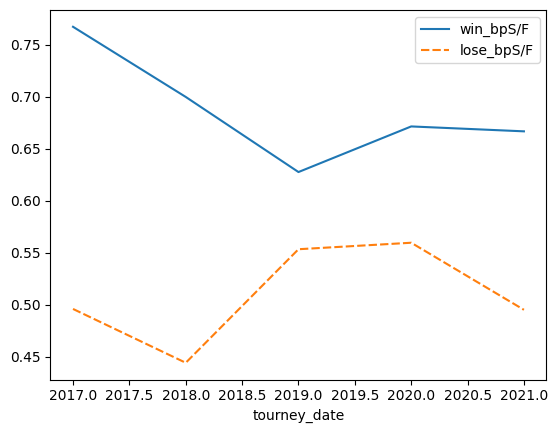

In [172]:
player_1_w = (
     player_1['win_bpS/F']
    .groupby(player_1["tourney_date"])
    .mean()
)

player_1_l = (
     player_1['lose_bpS/F']
    .groupby(player_1["tourney_date"])
    .mean()
)

player_1_bp = pd.merge(player_1_w, player_1_l, on='tourney_date')
sns.lineplot(data=player_1_bp[["win_bpS/F", "lose_bpS/F"]])

In [173]:
player_1_bp

,win_bpS/F,lose_bpS/F
tourney_date,,
2017,0.767280,0.496040
2018,0.699845,0.444291
2019,0.627644,0.553451
2020,0.671488,0.559685
2021,0.666771,0.495214


c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

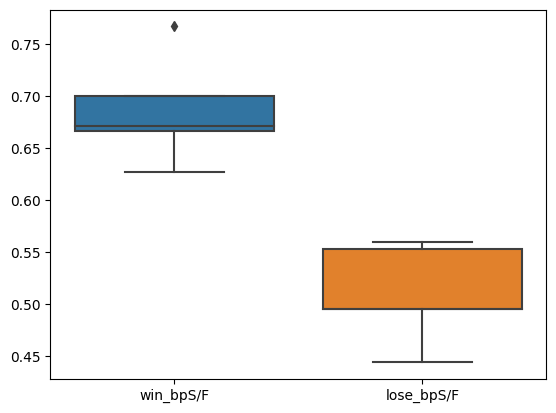

In [174]:
sns.boxplot(data=player_1_bp)

In [175]:
stats.ttest_ind(player_1_bp['win_bpS/F'], player_1_bp['lose_bpS/F'])

Ttest_indResult(statistic=5.611449801307858, pvalue=0.0005034822673568549)

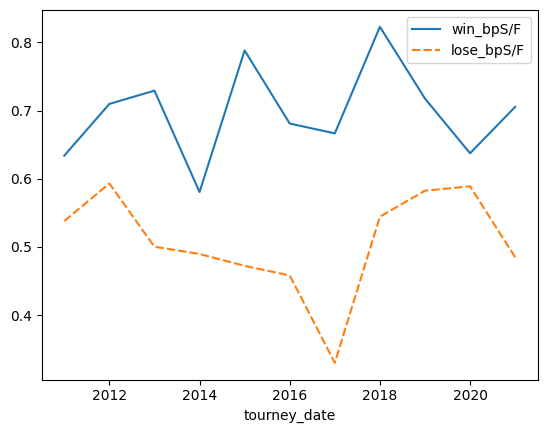

In [176]:
player_2_w = (
     player_2['win_bpS/F']
    .groupby(player_2["tourney_date"])
    .mean()
)

player_2_l = (
     player_2['lose_bpS/F']
    .groupby(player_2["tourney_date"])
    .mean()
)

player_2_bp = pd.merge(player_2_w, player_2_l, on='tourney_date')
sns.lineplot(data=player_2_bp[["win_bpS/F", "lose_bpS/F"]]);

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

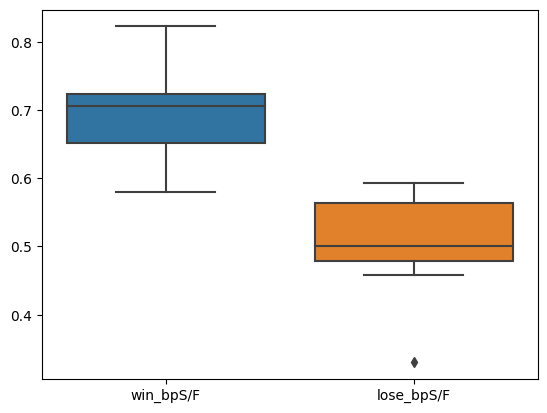

In [177]:
sns.boxplot(data=player_2_bp)

In [178]:
stats.ttest_ind(player_2_bp['win_bpS/F'], player_2_bp['lose_bpS/F'])

Ttest_indResult(statistic=6.120985959353489, pvalue=5.559379225452307e-06)

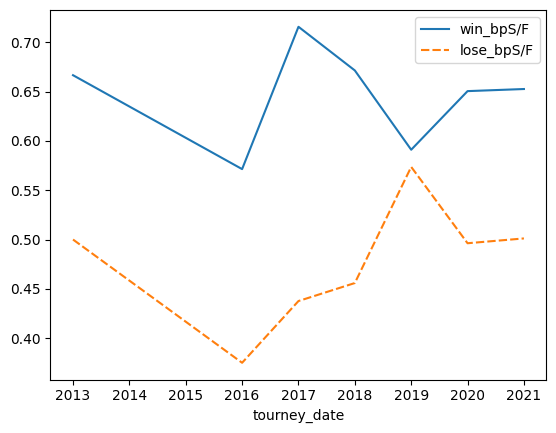

In [179]:
player_3_w = (
     player_3['win_bpS/F']
    .groupby(player_3["tourney_date"])
    .mean()
)

player_3_l = (
     player_3['lose_bpS/F']
    .groupby(player_3["tourney_date"])
    .mean()
)

player_3_bp = pd.merge(player_3_w, player_3_l, on='tourney_date')
sns.lineplot(data=player_3_bp[["win_bpS/F", "lose_bpS/F"]]);

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

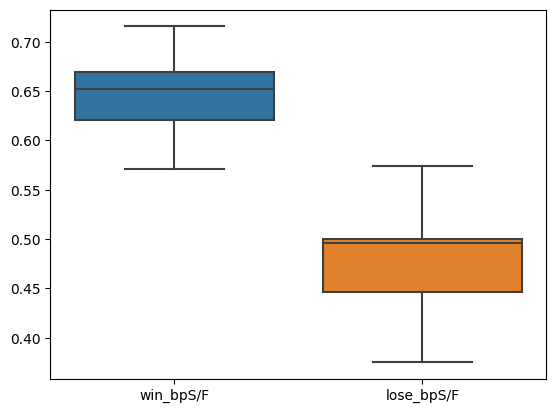

In [180]:
sns.boxplot(data=player_3_bp)

In [181]:
stats.ttest_ind(player_3_bp['win_bpS/F'], player_3_bp['lose_bpS/F'])

Ttest_indResult(statistic=5.618269641367509, pvalue=0.00011281539864748304)

У вас есть гипотеза, что доля выигранных брейк-поинтов связана с вероятностью победить в игре. Соберите статистику, где для каждого матча будет собран его исход (победа/поражение) и доля выигранных брейк-поинтов (не забудьте, что в матче два игрока). Разделите долю выигранных брейкпоинтов на группы выше/ниже медианы и, используя информацию о исходе матча, проверьте зависимость между количеством выигранных брейкпоинтов и результатом матча. Насколько сильна эта зависимость? Выбор статистического теста обоснуйте.

In [182]:
atp_matches['win_bpS/F'] = atp_matches['w_bpSaved'] / atp_matches['w_bpFaced']
atp_matches['lose_bpS/F'] = atp_matches['l_bpSaved'] / atp_matches['l_bpFaced']

In [183]:
values = {
   'win_bpS/F': atp_matches['win_bpS/F'].mean(),
   'lose_bpS/F': atp_matches['lose_bpS/F'].mean()
}
atp_matches = atp_matches.fillna(values)

In [184]:
atp_matches['win_bpS/F'].isna().sum()

0

In [185]:
atp_matches['lose_bpS/F'].isna().sum()

0

In [186]:
Marton = atp_matches.loc[
    (atp_matches['winner_name'] == 'Marton Fucsovics') 
    | (atp_matches['loser_name'] == 'Marton Fucsovics')
].copy()
Marton_win = atp_matches.loc[atp_matches['winner_name'] == 'Marton Fucsovics'].copy()
Marton_loss = atp_matches.loc[atp_matches['loser_name'] == 'Marton Fucsovics'].copy()

In [187]:
Marton['win_greater'] = Marton["win_bpS/F"] > Marton["win_bpS/F"].median()
Marton['win_greater'].tail()

2168    False
2442     True
2502     True
2774    False
2775     True
Name: win_greater, dtype: bool

In [188]:
bp_win = pd.concat(
    [(Marton_win['win_bpS/F']).reset_index(drop=True),
    pd.Series(np.ones_like(Marton_win['win_bpS/F']), name='win')],
    axis=1
)

bp_lose = pd.concat([
    (Marton_loss['win_bpS/F']).reset_index(drop=True),
    pd.Series(np.zeros_like(Marton_loss['win_bpS/F']),name='win')],
    axis=1
)

In [189]:
bp_win_lose = pd.concat([bp_win, bp_lose])

In [190]:
bp_win_lose = bp_win_lose.rename(columns={0:'bp_Saved'})
bp_win_lose

,win_bpS/F,win
0,0.666667,1.0
1,0.571429,1.0
2,0.571429,1.0
3,0.750000,1.0
4,0.714286,1.0
...,...,...
112,0.400000,0.0
113,0.500000,0.0
114,0.750000,0.0
115,0.750000,0.0


In [191]:
bp_win_lose['win_greater'] = bp_win_lose["win_bpS/F"] > Marton["win_bpS/F"].median()

In [192]:
bp_win_lose

,win_bpS/F,win,win_greater
0,0.666667,1.0,False
1,0.571429,1.0,False
2,0.571429,1.0,False
3,0.750000,1.0,True
4,0.714286,1.0,True
...,...,...,...
112,0.400000,0.0,False
113,0.500000,0.0,False
114,0.750000,0.0,True
115,0.750000,0.0,True


<AxesSubplot: xlabel='win', ylabel='win_bpS/F'>

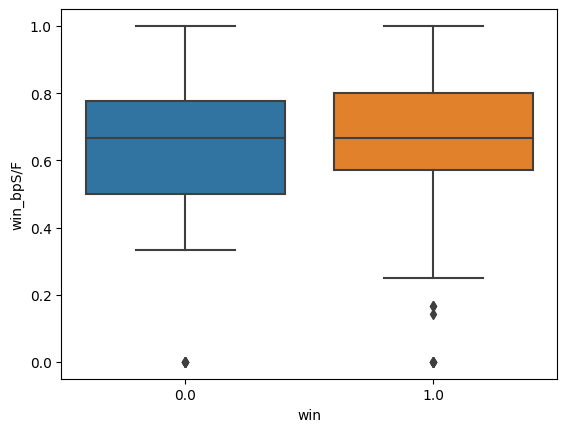

In [193]:
sns.boxplot(data=bp_win_lose, x='win', y='win_bpS/F')

In [194]:
pd.crosstab(bp_win_lose["win"].astype(bool), bp_win_lose['win_greater'])

win_greater,False,True
win,,
False,60,57
True,64,47


In [195]:
stats.chi2_contingency(
    pd.crosstab(bp_win_lose["win"].astype(bool),
    bp_win_lose['win_greater'])
)

(0.6940126803650363,
 0.40480286371396523,
 1,
 array([[63.63157895, 53.36842105],
        [60.36842105, 50.63157895]]))

In [196]:
chisq_stats = stats.chi2_contingency(
    pd.crosstab(bp_win_lose["win"].astype(bool),
    bp_win_lose['win_greater']),correction=False
)[0]

In [197]:
n = np.sum(pd.crosstab(bp_win_lose["win"].astype(bool), bp_win_lose['win_greater']))

In [198]:
n = n.sum()

In [199]:
minshape = min(pd.crosstab(bp_win_lose["win"].astype(bool), bp_win_lose['win_greater']).shape)-1

In [200]:
cramer = np.sqrt((chisq_stats/n)/minshape)
cramer

0.06398061410971642

Немного странные выводы, думаю не совсем правильно сделана выборка. Судя по данным - такой взаимосвязи нет.